In [0]:
#Description: This is a python program for crypto currency analysis

# Resources:
# Data: 
#    BTC: https://www.coindesk.com/price/bitcoin
#    ETH: https://www.coindesk.com/price/ethereum
#    LTC: https://www.coindesk.com/price/litecoin 

In [0]:
#Import the libraries
import numpy as np
import pandas as pd

In [2]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving BTC_USD_2019-03-22_2020-03-21-CoinDesk.csv to BTC_USD_2019-03-22_2020-03-21-CoinDesk.csv
Saving ETH_USD_2019-03-22_2020-03-21-CoinDesk.csv to ETH_USD_2019-03-22_2020-03-21-CoinDesk.csv
Saving LTC_USD_2019-03-22_2020-03-21-CoinDesk.csv to LTC_USD_2019-03-22_2020-03-21-CoinDesk.csv


In [0]:
# Store the data into dataframes
#Note the data starts from 366 days ago as of today(3/22/2020) from (3/22/2019) to (3/21/2019)
df_btc = pd.read_csv('BTC_USD_2019-03-22_2020-03-21-CoinDesk.csv')
df_eth = pd.read_csv('ETH_USD_2019-03-22_2020-03-21-CoinDesk.csv')
df_ltc = pd.read_csv('LTC_USD_2019-03-22_2020-03-21-CoinDesk.csv')

In [6]:
# Print the data for BTC
df_btc.head()


,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2019-03-22,3987.305225,3974.811248,4002.532316,3957.944316
1,BTC,2019-03-23,3977.707443,3977.276039,4006.984568,3961.802425
2,BTC,2019-03-24,3968.438701,3977.707443,3990.965292,3940.879744
3,BTC,2019-03-25,3913.781717,3972.696582,3982.232764,3903.293930
4,BTC,2019-03-26,3915.375320,3913.781742,3928.979427,3876.720858


In [7]:
# Print the first 5 rows of data for ETH
df_eth.head()


,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,ETH,2019-03-22,136.019499,134.791027,136.995373,134.056489
1,ETH,2019-03-23,136.449900,135.709843,137.606598,135.541305
2,ETH,2019-03-24,135.398581,136.449900,136.781789,134.453531
3,ETH,2019-03-25,133.302631,135.398713,136.242951,131.948549
4,ETH,2019-03-26,133.491076,133.302631,134.045312,131.846082


In [8]:
# Print the first 5 rows of LTC
df_ltc.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,LTC,2019-03-22,59.181304,58.380271,59.441719,57.889055
1,LTC,2019-03-23,60.401342,59.073363,61.458093,58.843770
2,LTC,2019-03-24,59.389013,60.401342,60.737729,58.634375
3,LTC,2019-03-25,58.642234,59.388854,60.327713,57.904412
4,LTC,2019-03-26,58.012024,58.641204,58.979753,57.149644


In [0]:
# Create a new dataframe that holds teh closing price of all 3 crypto currencies
df = pd.DataFrame({'BTC': df_btc['Closing Price (USD)'],
                   'ETH': df_eth['Closing Price (USD)'],
                   'LTC': df_ltc['Closing Price (USD)']
                   
    
})

In [10]:
#Show the new dataframe
df

,BTC,ETH,LTC
0,3987.305225,136.019499,59.181304
1,3977.707443,136.449900,60.401342
2,3968.438701,135.398581,59.389013
3,3913.781717,133.302631,58.642234
4,3915.375320,133.491076,58.012024
...,...,...,...
360,5465.582594,118.342404,35.014736
361,5363.822853,116.606598,34.343546
362,6301.063404,140.814546,40.327951
363,6185.279839,131.753158,37.784356


In [11]:
#Get statistics on the data 
df.describe()

,BTC,ETH,LTC
count,365.000000,365.000000,365.000000
mean,8414.963275,194.644372,73.075356
std,1914.127393,47.587005,25.035259
min,3913.781717,107.898345,32.053195
25%,7303.405759,162.934864,56.016995
50%,8548.948322,182.243815,69.747995
75%,9838.900016,224.238760,88.054669
max,12575.904067,324.130855,139.383189


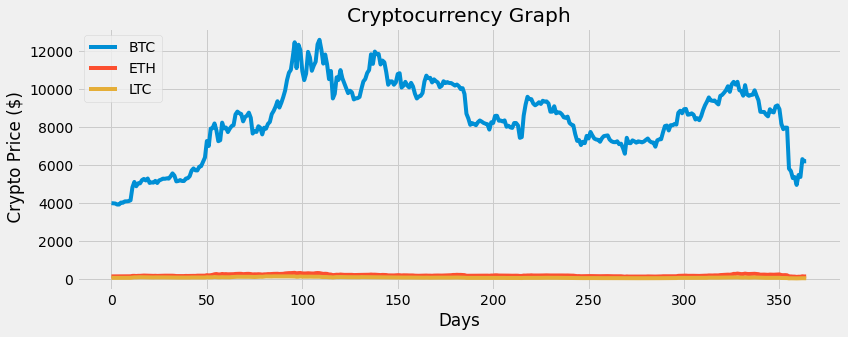

In [12]:
#Visualize the cryptocurrency closing prices 
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

my_crypto = df
plt.figure(figsize = (12.2, 4.5))
for c in my_crypto.columns.values:
  plt.plot(my_crypto[c], label = c)

plt.title('Cryptocurrency Graph')
plt.xlabel('Days')
plt.ylabel(' Crypto Price ($)')
plt.legend(my_crypto.columns.values, loc= 'upper left')
plt.show()

In [14]:
#Scale the data 
#the min-max scaler method scales the dataset so that all the input features lie between 0 and 100 inclusive
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 100))
scaled = min_max_scaler.fit_transform(df)
scaled

array([[ 0.84879323, 13.00505362, 25.27542206],
       [ 0.7379915 , 13.20409938, 26.41213946],
       [ 0.63098836, 12.7179009 , 25.4689459 ],
       ...,
       [27.56000886, 15.22259574,  7.70964052],
       [26.22334377, 11.03201972,  5.33975715],
       [26.24382272, 11.64641768,  5.98242028]])

In [0]:
# Convert the scaled data into a dataframe
df_scale = pd.DataFrame(scaled, columns = df.columns)

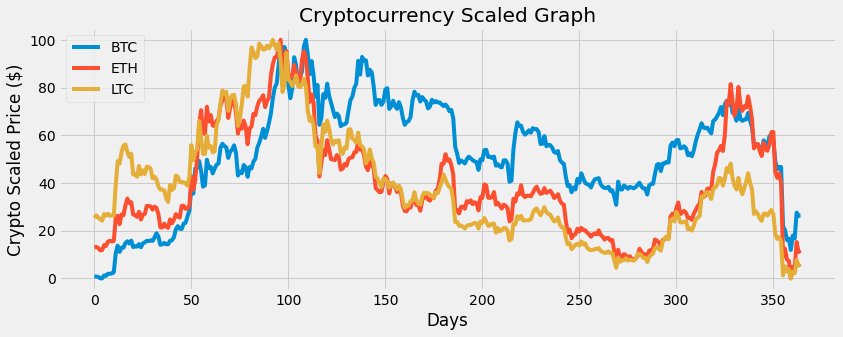

In [17]:
#Visualize the scaled data
my_crypto = df_scale

plt.figure(figsize=(12.4, 4.5))
for c in my_crypto.columns.values: 
  plt.plot(my_crypto[c], label=c)

plt.title('Cryptocurrency Scaled Graph')
plt.xlabel('Days')
plt.ylabel('Crypto Scaled Price ($)')
plt.legend(my_crypto.columns.values, loc = 'upper left')
plt.show()

In [18]:
#Get the daily simple return 
DSR = df.pct_change(1)
DSR

,BTC,ETH,LTC
0,NaN,NaN,NaN
1,-0.002407,0.003164,0.020615
2,-0.002330,-0.007705,-0.016760
3,-0.013773,-0.015480,-0.012574
4,0.000407,0.001414,-0.010747
...,...,...,...
360,0.105341,0.096795,0.092395
361,-0.018618,-0.014668,-0.019169
362,0.174734,0.207604,0.174251
363,-0.018375,-0.064350,-0.063073


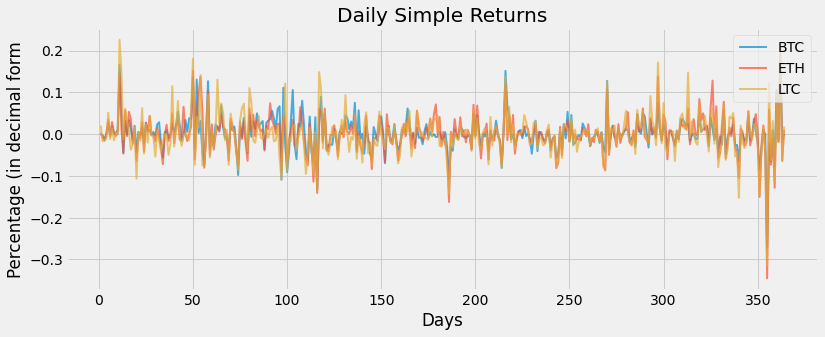

In [20]:
#Visualize the daily simple returns 
plt.figure(figsize=(12, 4.5))

for c in DSR.columns.values:
  plt.plot(DSR.index, DSR[c], label = c, lw = 2, alpha = .7)

plt.title('Daily Simple Returns')
plt.ylabel('Percentage (in decimal form')
plt.xlabel('Days')
plt.legend(DSR.columns.values, loc= 'upper right')
plt.show()

In [21]:
# Print the volatility /standard deviation σ (or sqrt(variance)) for daily simple returns
print('The cryptocurrency volatility:')
DSR.std()

The cryptocurrency volatility:


BTC    0.040951
ETH    0.047028
LTC    0.052875
dtype: float64

In [22]:
#Show the mean / average daily simple return 
DSR.mean()

BTC    0.002053
ETH    0.001089
LTC    0.000224
dtype: float64

In [23]:
#Get the correlation
#Correlation is used to determine when a change in one variable can result in a change in another.
DSR.corr()

,BTC,ETH,LTC
BTC,1.000000,0.836803,0.773194
ETH,0.836803,1.000000,0.848692
LTC,0.773194,0.848692,1.000000


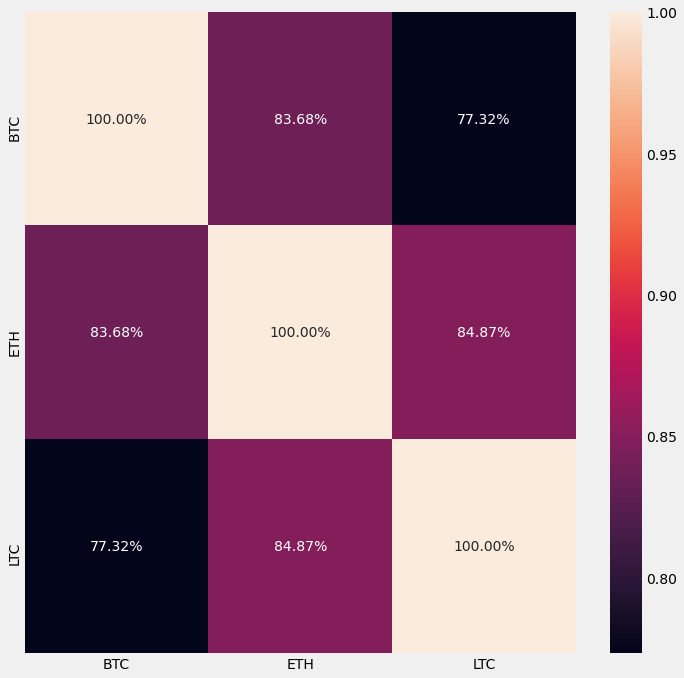

In [24]:
# Visualize the correlation
import seaborn as sns

plt.subplots(figsize= (11,11))
sns.heatmap(DSR.corr(), annot= True, fmt= '.2%')

In [25]:
#Get the daily cumulative simple returns 
DCSR = (DSR+1).cumprod()

#Show 
DCSR

,BTC,ETH,LTC
0,NaN,NaN,NaN
1,0.997593,1.003164,1.020615
2,0.995268,0.995435,1.003510
3,0.981561,0.980026,0.990891
4,0.981960,0.981411,0.980242
...,...,...,...
360,1.370746,0.870040,0.591652
361,1.345225,0.857279,0.580311
362,1.580281,1.035253,0.681431
363,1.551243,0.968634,0.638451


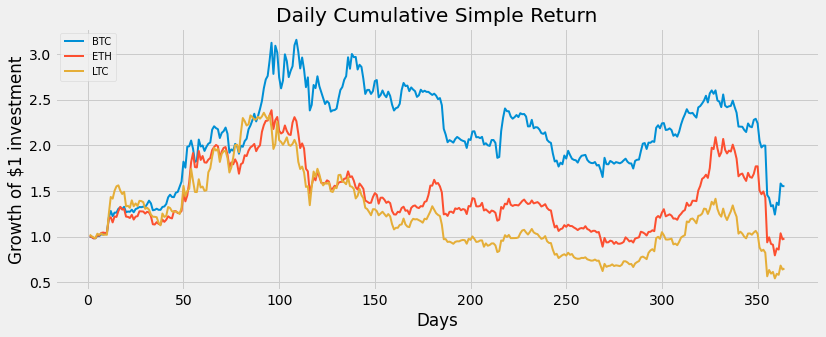

In [27]:
#Visualize the daily cumulative simple returns 
plt.figure(figsize=(12.2, 4.5))
for c in DCSR.columns.values:
  plt.plot(DCSR.index, DCSR[c], lw=2, label= c)

plt.title('Daily Cumulative Simple Return')
plt.xlabel('Days')
plt.ylabel('Growth of $1 investment')
plt.legend(DCSR.columns.values, loc = 'upper left', fontsize = 10)
plt.show()